In [ ]:
!pip install -U langgraph langchain_community langchain_google_genai langchain_experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 21.6 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstal

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
import getpass
import os
os.environ['GOOGLE_API_KEY'] = getpass.getpass('Enter your Gemini API key: ')

Enter your Gemini API key: ··········


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-lite")
llm

ChatGoogleGenerativeAI(model='models/gemini-2.0-flash-lite', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7b2ee59c6750>, default_metadata=(), model_kwargs={})

In [ ]:
prompt = "Translate this to hindi - I like playing cricket"
response = llm.invoke(prompt)

In [ ]:
response

AIMessage(content='Here are a few ways to translate "I like playing cricket" to Hindi, with slight variations in emphasis:\n\n*   **मुझे क्रिकेट खेलना पसंद है।** (Mujhe cricket khelna pasand hai.) - This is the most common and natural translation. It literally means "To me, playing cricket is liked."\n*   **मुझे क्रिकेट खेलना अच्छा लगता है।** (Mujhe cricket khelna accha lagta hai.) - This means "I like playing cricket" with a slightly more emphasis on "good" or "nice".\n*   **मुझे क्रिकेट खेलना पसंद है, मुझे अच्छा लगता है।** (Mujhe cricket khelna pasand hai, mujhe accha lagta hai.) - This translates to "I like playing cricket, it feels good to me."\n*   **मुझे क्रिकेट खेलना बहुत पसंद है।** (Mujhe cricket khelna bahut pasand hai.) - This emphasizes that you like playing cricket very much. Literally translates to "I like playing cricket a lot."\n\nThe first option, **मुझे क्रिकेट खेलना पसंद है।**, is generally the best and most commonly used.', additional_kwargs={}, response_metadata={'p

In [ ]:
print(response.content)

Here are a few ways to translate "I like playing cricket" to Hindi, with slight variations in emphasis:

*   **मुझे क्रिकेट खेलना पसंद है।** (Mujhe cricket khelna pasand hai.) - This is the most common and natural translation. It literally means "To me, playing cricket is liked."
*   **मुझे क्रिकेट खेलना अच्छा लगता है।** (Mujhe cricket khelna accha lagta hai.) - This means "I like playing cricket" with a slightly more emphasis on "good" or "nice".
*   **मुझे क्रिकेट खेलना पसंद है, मुझे अच्छा लगता है।** (Mujhe cricket khelna pasand hai, mujhe accha lagta hai.) - This translates to "I like playing cricket, it feels good to me."
*   **मुझे क्रिकेट खेलना बहुत पसंद है।** (Mujhe cricket khelna bahut pasand hai.) - This emphasizes that you like playing cricket very much. Literally translates to "I like playing cricket a lot."

The first option, **मुझे क्रिकेट खेलना पसंद है।**, is generally the best and most commonly used.


In [ ]:
type(response.content)

str

In [ ]:
from pydantic import BaseModel, Field

class SturcturedResponse(BaseModel):
    translated_text: str = Field(..., description="translated text")

In [ ]:
structured_llm = llm.with_structured_output(SturcturedResponse)
response = structured_llm.invoke(prompt)

In [ ]:
response

SturcturedResponse(translated_text='मुझे क्रिकेट खेलना पसंद है')

In [ ]:
response.model_dump()

{'translated_text': 'मुझे क्रिकेट खेलना पसंद है'}

In [ ]:
from pydantic import BaseModel, Field

class SturcturedResponse(BaseModel):
    name: str = Field(..., description="name of person")
    birth_data: str = Field(..., description="birth data of person in dd-mm-yyyy")
    age: int = Field(..., description="age in number")

In [ ]:
prompt = "my name is aisha i was born on september 1st 1999"
structured_llm = llm.with_structured_output(SturcturedResponse)
response = structured_llm.invoke(prompt)

In [ ]:
response.model_dump()

{'name': 'aisha', 'birth_data': '01-09-1999', 'age': 24}

## Langraph

In [ ]:
from langgraph.graph import StateGraph, END
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.runnables import Runnable
from typing import TypedDict

# Define the shared state structure
class GraphState(TypedDict):
    input: str
    summary: str
    rewritten: str

# Initialize LLM
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-lite")

# Define Agent 1: Summarizer
def summarize(state: GraphState) -> GraphState:
    user_input = state['input']
    prompt = f"Summarize this text into 1 line:\n\n{user_input}"
    summary = llm.invoke(prompt).content
    return {"summary": summary, **state}

# Define Agent 2: Rewriter
def rewrite(state: GraphState) -> GraphState:
    summary = state['summary']
    prompt = f"Rewrite the following text in hindi language:\n\n{summary}"
    rewritten = llm.invoke(prompt).content
    return {"rewritten": rewritten, **state}



In [ ]:
# Build the graph
builder = StateGraph(GraphState)

builder.add_node("summarizer", summarize)
builder.add_node("rewriter", rewrite)

# Define edges
builder.set_entry_point("summarizer")
builder.add_edge("summarizer", "rewriter")
builder.add_edge("rewriter", END)

# Compile the graph
graph = builder.compile()

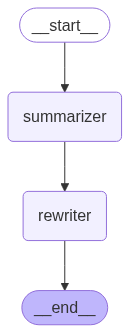

In [ ]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
# Run the graph
input_text = """LangChain is a framework for developing applications powered by language models.
It enables chaining multiple components like LLMs, retrievers, tools, etc., into a single coherent pipeline."""

result = graph.invoke({"input": input_text})

result

{'input': 'LangChain is a framework for developing applications powered by language models.\nIt enables chaining multiple components like LLMs, retrievers, tools, etc., into a single coherent pipeline.',
 'summary': 'LangChain is a framework that connects various components like language models to build applications powered by them.',
 'rewritten': 'यहां हिंदी में वही पाठ है:\n\nलैंगचैन एक ऐसा ढांचा है जो भाषा मॉडलों जैसे विभिन्न घटकों को जोड़ता है ताकि उनसे संचालित एप्लिकेशन बनाए जा सकें।'}

In [ ]:
result['summary']

'LangChain is a framework that connects various components like language models to build applications powered by them.'

In [ ]:
result['rewritten']

'यहां हिंदी में वही पाठ है:\n\nलैंगचैन एक ऐसा ढांचा है जो भाषा मॉडलों जैसे विभिन्न घटकों को जोड़ता है ताकि उनसे संचालित एप्लिकेशन बनाए जा सकें।'

In [ ]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict

# Define shared state
class GraphState(TypedDict):
    input: str
    summary: str
    rewritten: str

# Initialize LLM
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-lite")

# Agent 1: Summarizer
def summarize(state: GraphState) -> GraphState:
    prompt = f"Summarize this text:\n\n{state['input']}"
    summary = llm.invoke(prompt).content
    return {"summary": summary}

# Agent 2: Rewriter
def rewrite(state: GraphState) -> GraphState:
    prompt = f"Rewrite this summary more casually:\n\n{state['summary']}"
    rewritten = llm.invoke(prompt).content
    return {"rewritten": rewritten}

# Router function for conditional logic
def route_summary(state: GraphState) -> str:
    return "rewriter" if len(state["summary"]) > 200 else END

In [ ]:
# Build the graph
builder = StateGraph(GraphState)
builder.add_node("summarizer", summarize)
builder.add_node("rewriter", rewrite)

builder.add_edge(START, "summarizer")
# Use add_conditional_edges, not add_conditional
builder.add_conditional_edges(
    "summarizer",
    route_summary,
    # Map router output to the next node
    {"rewriter": "rewriter", END: END}
)
builder.add_edge("rewriter", END)

graph = builder.compile()

# Compile
graph = builder.compile()

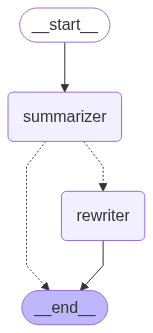

In [ ]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
# Example run
input_text = """LangChain is a framework for developing applications powered by language models.
It enables chaining multiple components like LLMs, retrievers, tools, etc., into a single coherent pipeline.
This is particularly useful for complex NLP workflows and agent-like behaviors."""

result = graph.invoke({"input": input_text})
result

{'input': 'LangChain is a framework for developing applications powered by language models.\nIt enables chaining multiple components like LLMs, retrievers, tools, etc., into a single coherent pipeline.\nThis is particularly useful for complex NLP workflows and agent-like behaviors.',
 'summary': 'LangChain is a framework that helps developers build applications using language models. It allows you to connect different components (like language models, search tools, etc.) to create complex, automated workflows, especially for tasks like natural language processing and building AI agents.',
 'rewritten': 'Okay, here\'s a more casual rewrite of that summary:\n\n**Option 1 (Short & Sweet):**\n\n> LangChain is a handy tool for building apps that use language models (like those fancy AI things!). It lets you hook up different AI bits and pieces to automate tasks, especially things involving understanding and using language.\n\n**Option 2 (Slightly More Detail):**\n\n> Think of LangChain as a

In [ ]:
result['summary']

'LangChain is a framework that helps developers build applications using language models. It allows you to connect different components (like language models, search tools, etc.) to create complex, automated workflows, especially for tasks like natural language processing and building AI agents.'

In [ ]:
result['rewritten']

'Okay, here\'s a more casual rewrite of that summary:\n\n**Option 1 (Short & Sweet):**\n\n> LangChain is a handy tool for building apps that use language models (like those fancy AI things!). It lets you hook up different AI bits and pieces to automate tasks, especially things involving understanding and using language.\n\n**Option 2 (Slightly More Detail):**\n\n> Think of LangChain as a toolbox for developers who want to build cool stuff with AI language models. It helps you combine different AI "ingredients" – like language models, search engines, and more – to create automated workflows. This is super useful for things like making computers understand and respond to natural language, or even building AI assistants.'

In [ ]:
# Example run
input_text = """LangChain is a framework for developing applications."""

result = graph.invoke({"input": input_text})
result

{'input': 'LangChain is a framework for developing applications.',
 'summary': 'LangChain is a framework designed to help developers build applications.'}